# Imports

In [108]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.formats.style import Styler
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import sys
import os
from random import choice
import gc

import warnings; warnings.filterwarnings('ignore')

from cycler import cycler
from colorama import Style, Fore
from IPython.display import display

import cv2

sys.path.append('..')
from config import CFG
CFG = CFG()
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', CFG.NCOLS)
pd.set_option('display.max_rows', CFG.NROWS)

# Visuals Configurations

In [43]:
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
grn = Style.BRIGHT + Fore.GREEN
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

palette = ['#3c3744', '#048BA8', '#EE6352', '#E1BB80', '#78BC61']
grey_palette = ['#8e8e93', '#636366', '#48484a', '#3a3a3c', '#2c2c2e', '#1c1c27']
bg_color = '#F6F5F5'
white_color = '#d1d1d6'

custom_params = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.left': False,
    'grid.alpha':0.2,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'large',
    'axes.labelsize': 'large',
    'ytick.labelsize': 'medium',
    'xtick.labelsize': 'medium',
    'legend.fontsize': 'large',
    'lines.linewidth': 1,
    'axes.prop_cycle': cycler('color',palette),
    'figure.facecolor': bg_color,
    'figure.edgecolor': bg_color,
    'axes.facecolor': bg_color,
    'text.color':grey_palette[1],
    'axes.labelcolor':grey_palette[1],
    'axes.edgecolor':grey_palette[1],
    'xtick.color':grey_palette[1],
    'ytick.color':grey_palette[1],
    'figure.dpi':150,
}
sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params)

display(sns.color_palette(palette))
display(sns.color_palette(grey_palette))
display(sns.color_palette([bg_color, white_color]))

[(0.23529411764705882, 0.21568627450980393, 0.26666666666666666),
 (0.01568627450980392, 0.5450980392156862, 0.6588235294117647),
 (0.9333333333333333, 0.38823529411764707, 0.3215686274509804),
 (0.8823529411764706, 0.7333333333333333, 0.5019607843137255),
 (0.47058823529411764, 0.7372549019607844, 0.3803921568627451)]

[(0.5568627450980392, 0.5568627450980392, 0.5764705882352941),
 (0.38823529411764707, 0.38823529411764707, 0.4),
 (0.2823529411764706, 0.2823529411764706, 0.2901960784313726),
 (0.22745098039215686, 0.22745098039215686, 0.23529411764705882),
 (0.17254901960784313, 0.17254901960784313, 0.1803921568627451),
 (0.10980392156862745, 0.10980392156862745, 0.15294117647058825)]

[(0.9647058823529412, 0.9607843137254902, 0.9607843137254902),
 (0.8196078431372549, 0.8196078431372549, 0.8392156862745098)]

In [60]:
# Dataframe visual helper functions

def magnify(is_test: bool = False):
    """
    Magnifies the cell the cursor is hovering above as well as the adjacent cells to a lesser degree
    """
    base_color = '#457ea5'
    if is_test:
            highlight_target_row = []
    else:
            highlight_target_row = [
                dict(
                    selector='tr:last-child',
                    props=[('background-color', f'{base_color}20')],
                )
            ]
            
    return [dict(selector="th",
                    props=[("font-size", "11pt"),
                        ('background-color', f'{base_color}'),
                        ('color', 'white'),
                        ('font-weight', 'bold'),
                        ('border-bottom', '0.1px solid white'),
                        ('border-left', '0.1px solid white'),
                        ('text-align', 'right')]),

            dict(selector='th.blank.level0', 
                props=[('font-weight', 'bold'),
                        ('border-left', '1.7px solid white'),
                        ('background-color', 'white')]),

            dict(selector="td",
                    props=[('padding', "0.5em 1em"),
                        ('text-align', 'right')]),

            dict(selector="th:hover",
                    props=[("font-size", "14pt")]),

            dict(selector="tr:hover td:hover",
                    props=[('max-width', '250px'),
                        ('font-size', '14pt'),
                        ('color', f'{base_color}'),
                        ('font-weight', 'bold'),
                        ('background-color', 'white'),
                        ('border', f'1px dashed {base_color}')]),

                dict(selector="caption",
                    props=[(('caption-side', 'bottom'))])] + highlight_target_row

def stylize_describe(df: pd.DataFrame, dataset_name: str = 'train', is_test: bool = False) -> Styler:
    """
    Applies .describe() method to the df and wraps it into the Styler.
    """
    s = df.describe().T
    # A formatting dictionary for controlling each column precision (.000 <-). 
    di_frmt = {(i if i == 'count' else i):
              ('{:.0f}' if i == 'count' else '{:.3f}') for i in s.columns}
    
    s = s.style.set_table_styles(magnify(is_test))\
        .format(di_frmt)\
        .set_caption(f"The {dataset_name} dataset descriptive statistics (hover to magnify).")
    return s

def stylize_simple(df: pd.DataFrame, caption: str) -> Styler:
    """
    Wraps the min_max_count pivot_table into the Styler.
    """
    s = df
    s = s.style.set_table_styles(magnify(True)).set_caption(f"{caption}")
    return s

# Data Exploration

- tdcsfog:
  - "comprising data series collected in the lab, as subjects completed a FOG-provoking protocol"
- defog:
  - "comprising data series collected in the subject's home, as subjects completed a FOG-provoking protocol"
- notype
  - "Series in the notype folder are from the defog dataset but lack event-type annotations"
- unlabeled
  - "Folder containing the unannotated data series from the daily dataset, one series per subject. Forty-five of the subjects also have series in the defog dataset, some in the training split and some in the test split. Accelerometer data has units of g."

"Trials from the tdcsfog and defog datasets were videotaped and annotated by expert reviewers documented the freezing of gait episodes. That is, the start, end and type of each episode were marked by the experts. Series in the daily dataset are unannotated. You will be detecting FOG episodes for the tdcsfog and defog series. You may wish to apply unsupervised or semi-supervised methods to the series in the daily dataset to support your detection modelling."

See this page for more on these datasets as well as video examples of freezing of gait events: [additional data documentation](https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction/overview/additional-data-documentation)

## Train Data

In [87]:
print(
    f'\t{gld}Number of files in "train/defog"\t--> \t {red}{len(os.listdir(f"{CFG.TRAIN_PATH}/defog"))}{res}'
)
print(
    f'\t{gld}Number of files in "train/notype"\t--> \t {red}{len(os.listdir(f"{CFG.TRAIN_PATH}/notype"))}{res}'
)
print(
    f'\t{gld}Number of files in "train/tdcsfog"\t--> \t {red}{len(os.listdir(f"{CFG.TRAIN_PATH}/tdcsfog"))}{res}'
)

	Number of files in "train/defog"	--> 	 91
	Number of files in "train/notype"	--> 	 46
	Number of files in "train/tdcsfog"	--> 	 833


## Train tdcsfog

In [62]:
example = choice(os.listdir(f"{CFG.TRAIN_PATH}/tdcsfog"))
train_tdcsfog_example = pd.read_csv(f"{CFG.TRAIN_PATH}/tdcsfog/{example}")

print(f"\t{gld}Shape of tdcsfog example dataframe \t --> \t {red}{train_tdcsfog_example.shape}{res}")
display(stylize_simple(train_tdcsfog_example.head(5), "train tdcsfog example dataframe, top 5 rows (hover to magnify)"))
display(stylize_describe(train_tdcsfog_example, dataset_name='train tdcsfog example'))

	Shape of tdcsfog example dataframe 	 --> 	 (5677, 7)


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.654794,0.163997,-0.242553,0,0,0
1,1,-9.647961,0.159379,-0.231259,0,0,0
2,2,-9.653297,0.163532,-0.236214,0,0,0
3,3,-9.657341,0.166137,-0.238182,0,0,0
4,4,-9.657481,0.159254,-0.240579,0,0,0


,count,mean,std,min,25%,50%,75%,max
Time,5677,2838.000,1638.953,0.000,1419.000,2838.000,4257.000,5676.000
AccV,5677,-8.950,1.046,-18.202,-9.652,-8.959,-8.340,-4.607
AccML,5677,0.438,1.159,-4.552,-0.120,0.235,1.132,6.252
AccAP,5677,3.510,1.888,-2.104,3.173,3.903,4.614,10.667
StartHesitation,5677,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Turn,5677,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Walking,5677,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### Time Series Plots

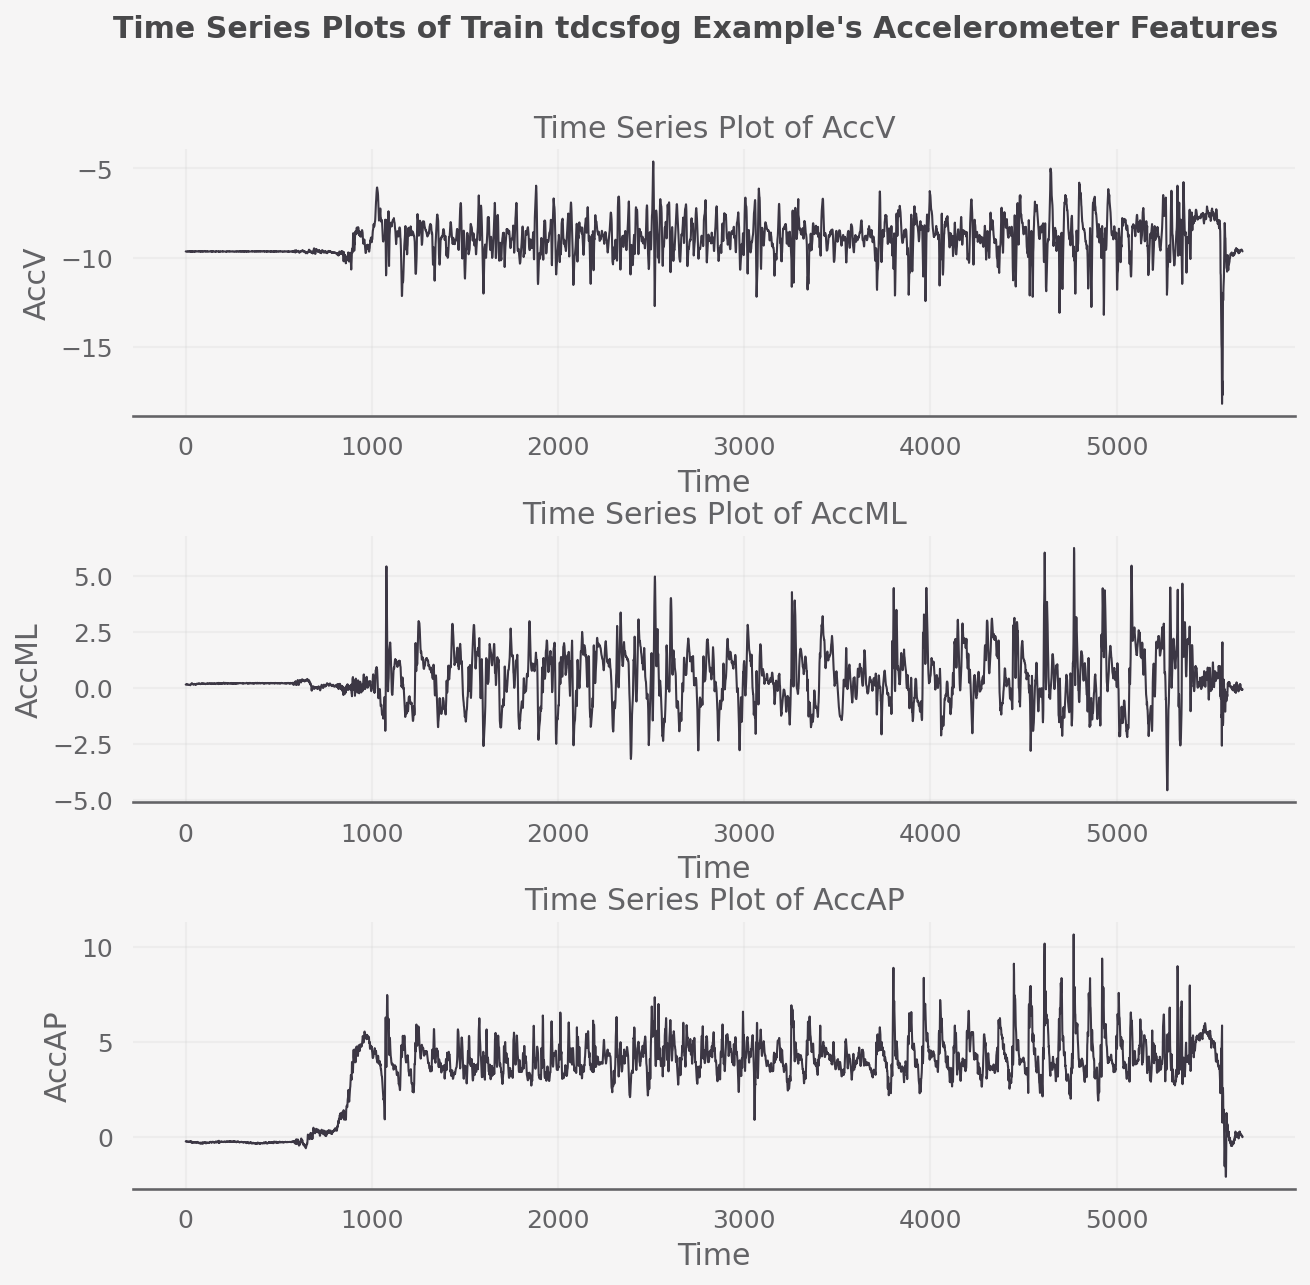

In [97]:
features = ['AccV','AccML','AccAP']

fig, axes = plt.subplots(3, 1, figsize=(10, 9))

for ax, col in zip(axes.ravel(), features):
    sns.lineplot(train_tdcsfog_example, x='Time', y=col, palette=grey_palette[3], ax=ax).set(title=f'Time Series Plot of {col}')

del train_tdcsfog_example

plt.subplots_adjust(hspace=0.45)
plt.suptitle(f"Time Series Plots of Train tdcsfog Example's Accelerometer Features\n\n", ha='center',  fontweight='bold', color=grey_palette[2])
plt.show()

## Train defog

In [98]:
example = choice(os.listdir(f"{CFG.TRAIN_PATH}/defog"))
train_defog_example = pd.read_csv(f"{CFG.TRAIN_PATH}/defog/{example}")

print(f"\t{gld}Shape of defog example dataframe \t --> \t {red}{train_defog_example.shape}{res}")
display(stylize_simple(train_defog_example.head(5), "train defog example dataframe, top 5 rows (hover to magnify)"))
display(stylize_describe(train_defog_example, dataset_name='train defog example'))

	Shape of defog example dataframe 	 --> 	 (120032, 9)


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-0.971095,0.133337,-0.272726,0,0,0,False,False
1,1,-0.973735,0.133356,-0.272458,0,0,0,False,False
2,2,-0.975561,0.135696,-0.275645,0,0,0,False,False
3,3,-0.975284,0.136963,-0.276855,0,0,0,False,False
4,4,-0.971849,0.136900,-0.276499,0,0,0,False,False


,count,mean,std,min,25%,50%,75%,max
Time,120032,60015.500,34650.398,0.000,30007.750,60015.500,90023.250,120031.000
AccV,120032,-0.974,0.064,-3.135,-0.993,-0.975,-0.959,0.364
AccML,120032,0.125,0.072,-0.672,0.103,0.127,0.145,1.780
AccAP,120032,-0.227,0.141,-2.098,-0.302,-0.264,-0.215,1.254
StartHesitation,120032,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Turn,120032,0.004,0.059,0.000,0.000,0.000,0.000,1.000
Walking,120032,0.003,0.052,0.000,0.000,0.000,0.000,1.000


### Time Series Plots

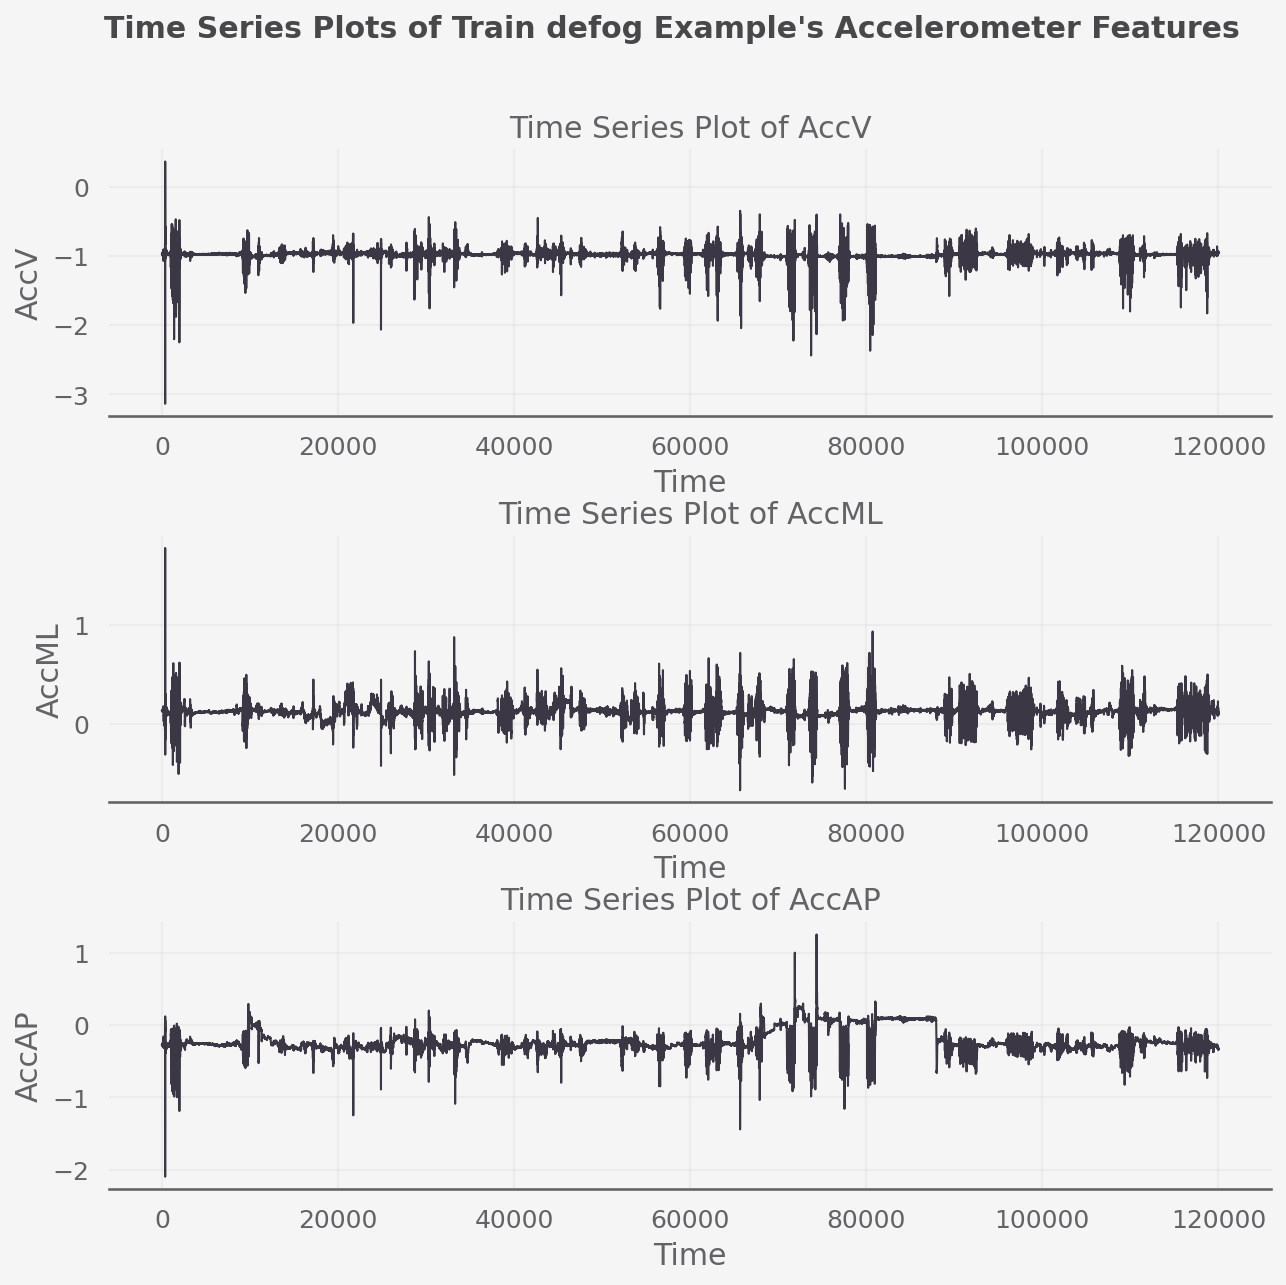

In [99]:
features = ['AccV','AccML','AccAP']

fig, axes = plt.subplots(3, 1, figsize=(10, 9))

for ax, col in zip(axes.ravel(), features):
    sns.lineplot(train_defog_example, x='Time', y=col, palette=grey_palette[3], ax=ax).set(title=f'Time Series Plot of {col}')

del train_defog_example

plt.subplots_adjust(hspace=0.45)
plt.suptitle(f"Time Series Plots of Train defog Example's Accelerometer Features\n\n", ha='center',  fontweight='bold', color=grey_palette[2])
plt.show()

## Train notype

In [100]:
example = choice(os.listdir(f"{CFG.TRAIN_PATH}/notype"))
train_notype_example = pd.read_csv(f"{CFG.TRAIN_PATH}/notype/{example}")

print(f"\t{gld}Shape of notype example dataframe \t --> \t {red}{train_notype_example.shape}{res}")
display(stylize_simple(train_notype_example.head(5), "train notype example dataframe, top 5 rows (hover to magnify)"))
display(stylize_describe(train_notype_example, dataset_name='train notype example'))

	Shape of notype example dataframe 	 --> 	 (210568, 7)


,Time,AccV,AccML,AccAP,Event,Valid,Task
0,0,-0.930052,-0.144646,-0.283926,0,False,False
1,1,-0.929800,-0.148642,-0.282103,0,False,False
2,2,-0.932666,-0.150252,-0.279350,0,False,False
3,3,-0.941500,-0.148748,-0.273848,0,False,False
4,4,-0.945129,-0.145917,-0.275751,0,False,False


,count,mean,std,min,25%,50%,75%,max
Time,210568,105283.500,60785.890,0.000,52641.750,105283.500,157925.250,210567.000
AccV,210568,-0.936,0.081,-3.824,-0.973,-0.942,-0.909,0.141
AccML,210568,-0.124,0.087,-1.835,-0.167,-0.132,-0.096,1.897
AccAP,210568,-0.288,0.125,-2.742,-0.363,-0.298,-0.186,0.553
Event,210568,0.001,0.029,0.000,0.000,0.000,0.000,1.000


### Time Series Plots

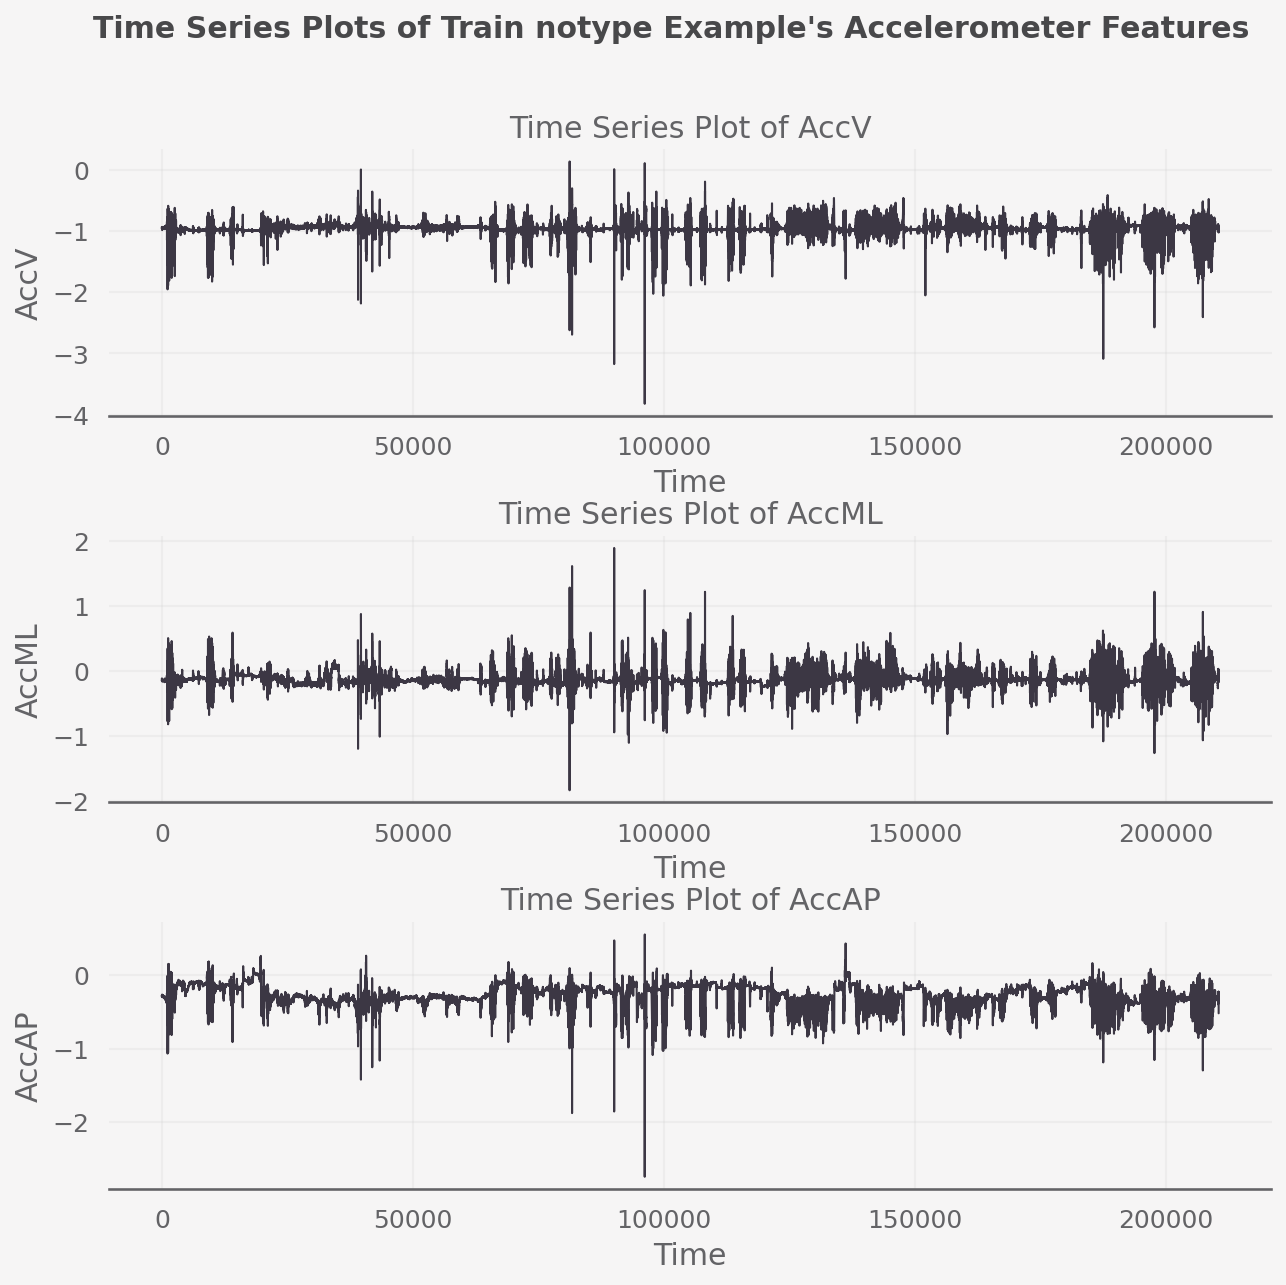

In [101]:
features = ['AccV','AccML','AccAP']

fig, axes = plt.subplots(3, 1, figsize=(10, 9))

for ax, col in zip(axes.ravel(), features):
    sns.lineplot(train_notype_example, x='Time', y=col, palette=grey_palette[3], ax=ax).set(title=f'Time Series Plot of {col}')

del train_notype_example

plt.subplots_adjust(hspace=0.45)
plt.suptitle(f"Time Series Plots of Train notype Example's Accelerometer Features\n\n", ha='center',  fontweight='bold', color=grey_palette[2])
plt.show()

## Test Data Exploration

In [73]:
print(
    f'\t{gld}Number of files in "test/defog" \t--> \t {red}{len(os.listdir(f"{CFG.TEST_PATH}/defog"))}{res}'
)
print(
    f'\t{gld}Number of files in "test/tdcsfog"\t--> \t {red}{len(os.listdir(f"{CFG.TEST_PATH}/tdcsfog"))}{res}'
)

	Number of files in "test/defog" 	--> 	 1
	Number of files in "test/tdcsfog"	--> 	 1


In [86]:
test_tdcsfog = pd.read_csv(f'{CFG.TEST_PATH}/tdcsfog/003f117e14.csv')
print(f'\t{gld}Shape of test tdcsfog dataframe \t --> \t {red}{test_tdcsfog.shape}')
display(stylize_simple(test_tdcsfog.head(5), 'test tdcsfog dataframe, top 5 rows (hover to magnify)'))
display(stylize_describe(test_tdcsfog, dataset_name='test tdcsfog'))

	Shape of test tdcsfog dataframe 	 --> 	 (4682, 4)


,Time,AccV,AccML,AccAP
0,0,-9.533939,0.566322,-1.413525
1,1,-9.536140,0.564137,-1.440621
2,2,-9.529345,0.561765,-1.429332
3,3,-9.531239,0.564227,-1.415490
4,4,-9.540825,0.561854,-1.429471


,count,mean,std,min,25%,50%,75%,max
Time,4682,2340.500,1351.721,0.000,1170.250,2340.500,3510.750,4681.000
AccV,4682,-9.151,1.384,-23.796,-9.538,-9.235,-8.470,-3.916
AccML,4682,0.754,1.102,-9.097,0.323,0.581,1.368,5.997
AccAP,4682,2.472,2.240,-7.353,1.967,3.138,3.820,10.281


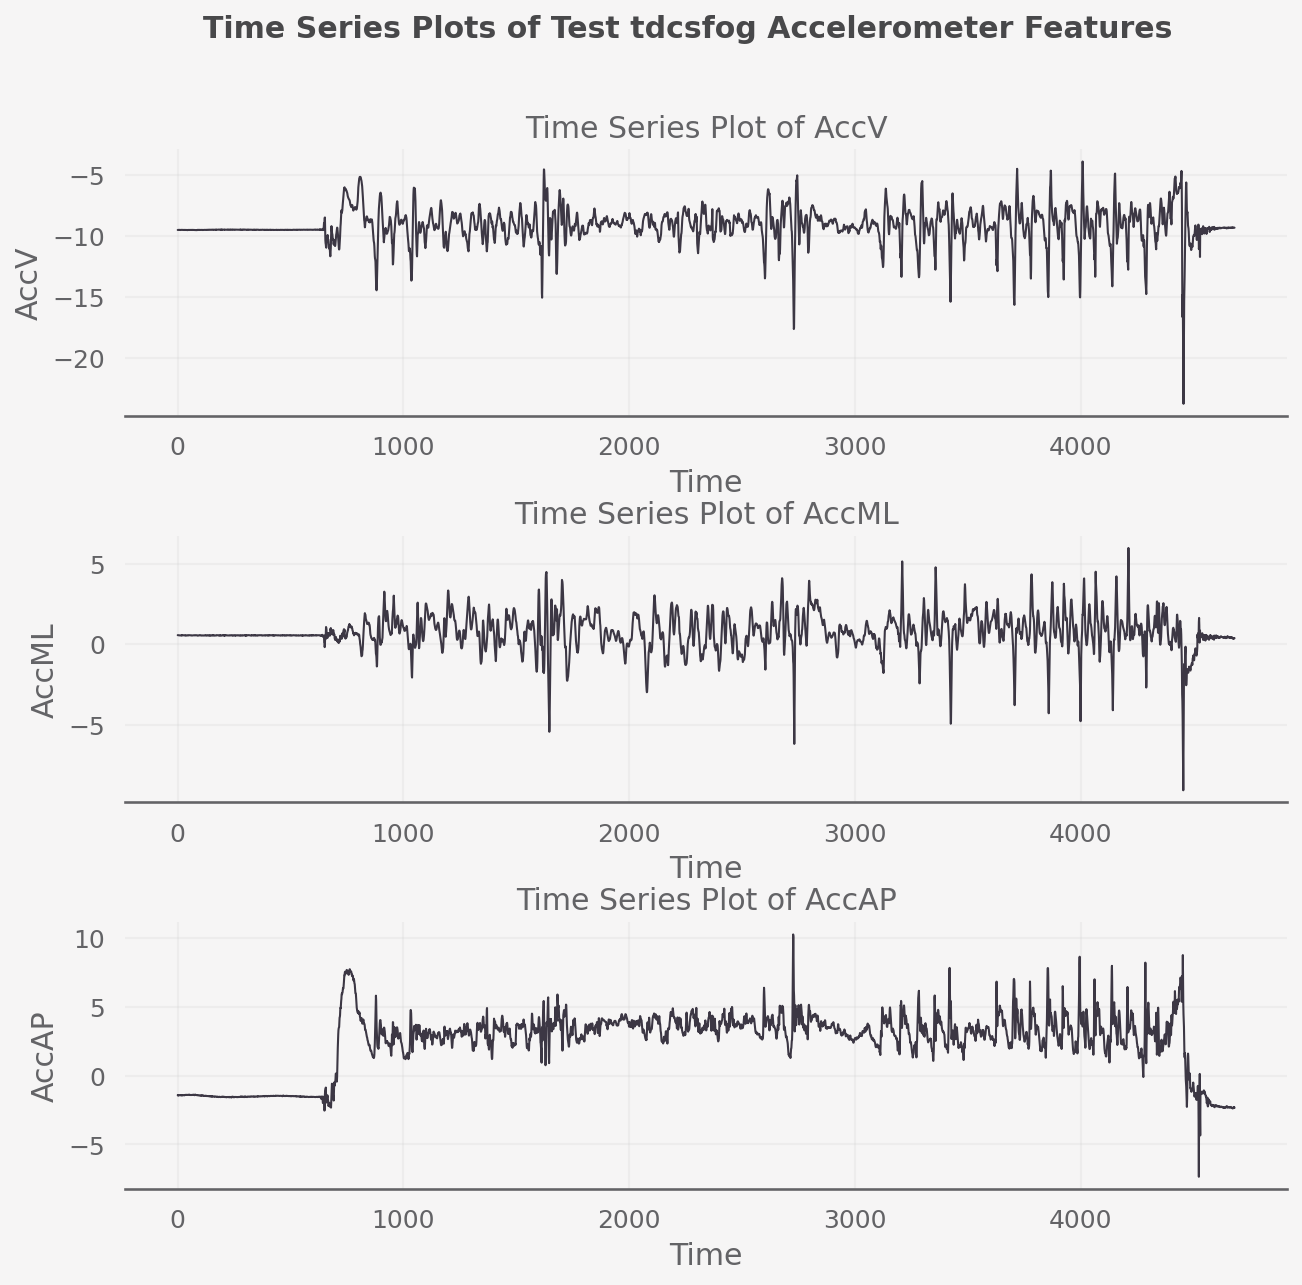

In [102]:
features = ['AccV','AccML','AccAP']

fig, axes = plt.subplots(3, 1, figsize=(10, 9))

for ax, col in zip(axes.ravel(), features):
    sns.lineplot(test_tdcsfog, x='Time', y=col, palette=grey_palette[3], ax=ax).set(title=f'Time Series Plot of {col}')

del test_tdcsfog

plt.subplots_adjust(hspace=0.45)
plt.suptitle(f"Time Series Plots of Test tdcsfog Accelerometer Features\n\n", ha='center',  fontweight='bold', color=grey_palette[2])
plt.show()

## Test defog

In [104]:
test_defog = pd.read_csv(f'{CFG.TEST_PATH}/defog/02ab235146.csv')
print(f'\t{gld}Shape of test defog dataframe \t --> \t {red}{test_defog.shape}')
display(stylize_simple(test_defog.head(5), 'test defog dataframe, top 5 rows (hover to magnify)'))
display(stylize_describe(test_defog, dataset_name='test defog'))

	Shape of test defog dataframe 	 --> 	 (281688, 4)


,Time,AccV,AccML,AccAP
0,0,-0.914652,-0.300851,0.298156
1,1,-0.914367,-0.301572,0.298325
2,2,-0.779540,-0.343197,0.275690
3,3,-0.993162,-0.270281,0.315775
4,4,-0.948767,-0.307849,0.297191


,count,mean,std,min,25%,50%,75%,max
Time,281688,140843.500,81316.466,0.000,70421.750,140843.500,211265.250,281687.000
AccV,281688,-0.942,0.072,-2.417,-0.982,-0.953,-0.899,0.537
AccML,281688,-0.040,0.146,-1.084,-0.208,0.005,0.069,0.739
AccAP,281688,-0.018,0.272,-1.090,-0.219,-0.088,0.243,1.037


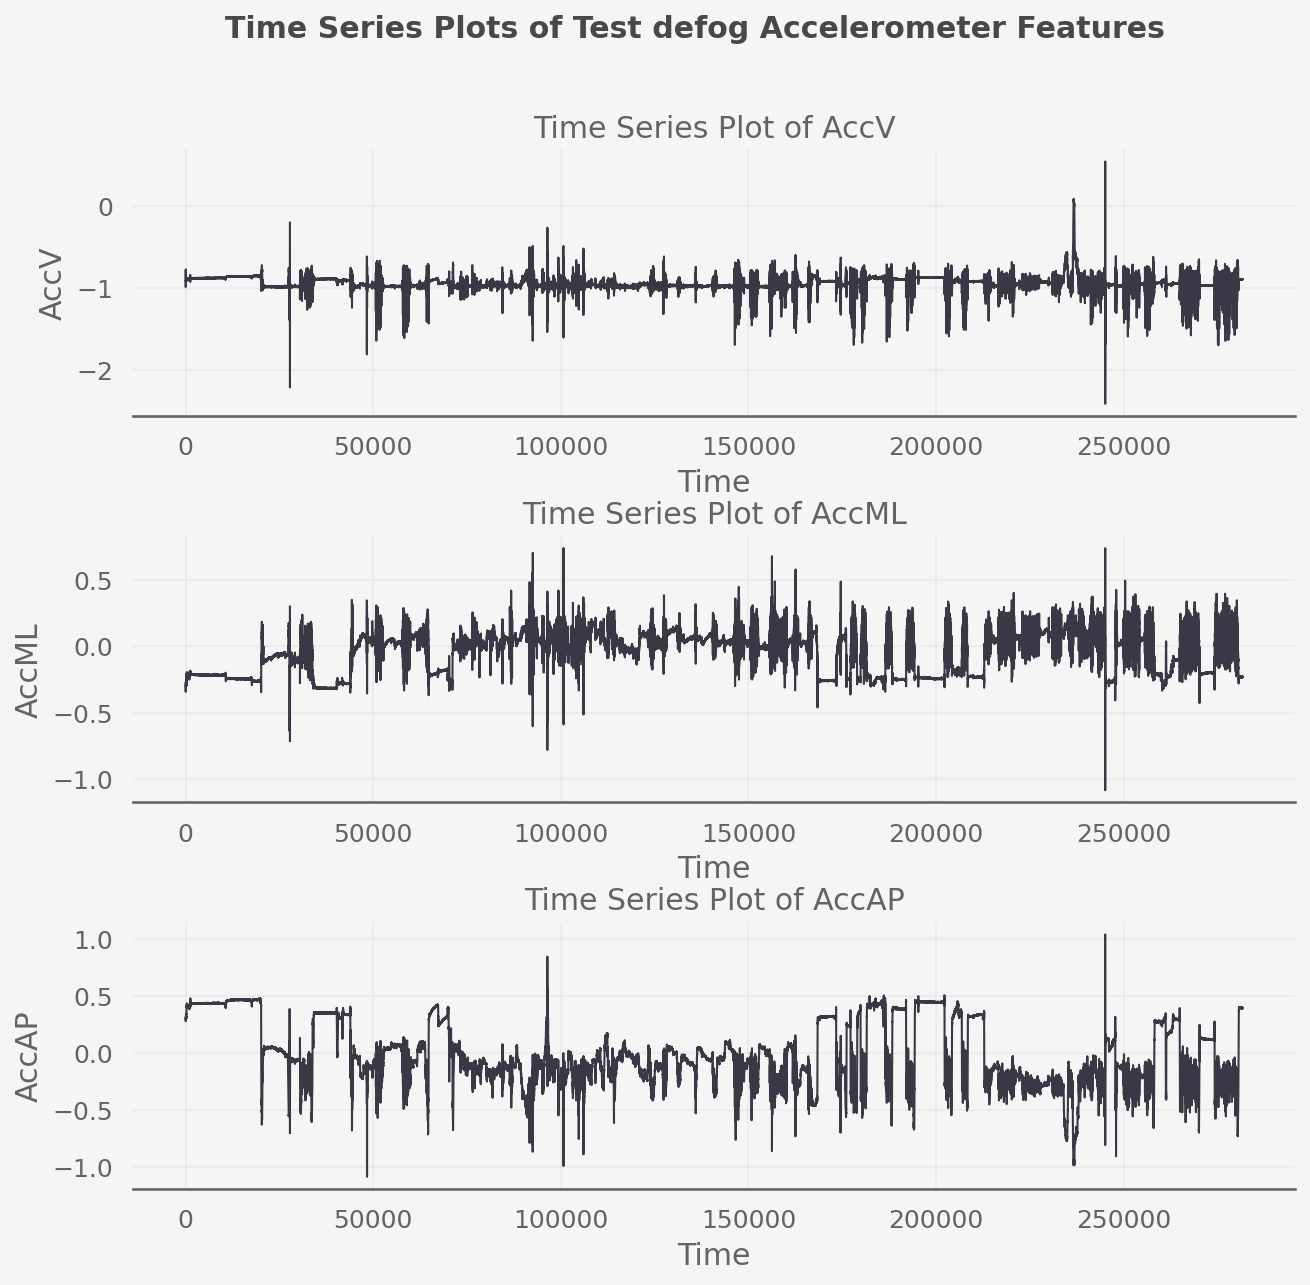

In [105]:
features = ['AccV','AccML','AccAP']

fig, axes = plt.subplots(3, 1, figsize=(10, 9))

for ax, col in zip(axes.ravel(), features):
    sns.lineplot(test_defog, x='Time', y=col, palette=grey_palette[3], ax=ax).set(title=f'Time Series Plot of {col}')

del test_defog

plt.subplots_adjust(hspace=0.45)
plt.suptitle(f"Time Series Plots of Test defog Accelerometer Features\n\n", ha='center',  fontweight='bold', color=grey_palette[2])
plt.show()

## Unlabeled Data Exploration

In [96]:
print(
    f'\t{gld}Number of files in "unlabeled"   \t--> \t {red}{len(os.listdir(f"{CFG.UNLABELED_PATH}"))}{res}'
)
example = choice(os.listdir(f"{CFG.UNLABELED_PATH}"))
unlabeled_example = pd.read_parquet(f'{CFG.UNLABELED_PATH}/{example}')
print(f'\t{gld}Shape of unlabeled example\t\t --> \t {red}{unlabeled_example.shape}{res}')

	Number of files in "unlabeled"   	--> 	 65
	Shape of unlabeled example		 --> 	 (69119372, 4)


### Time Series Plots

KeyboardInterrupt: 

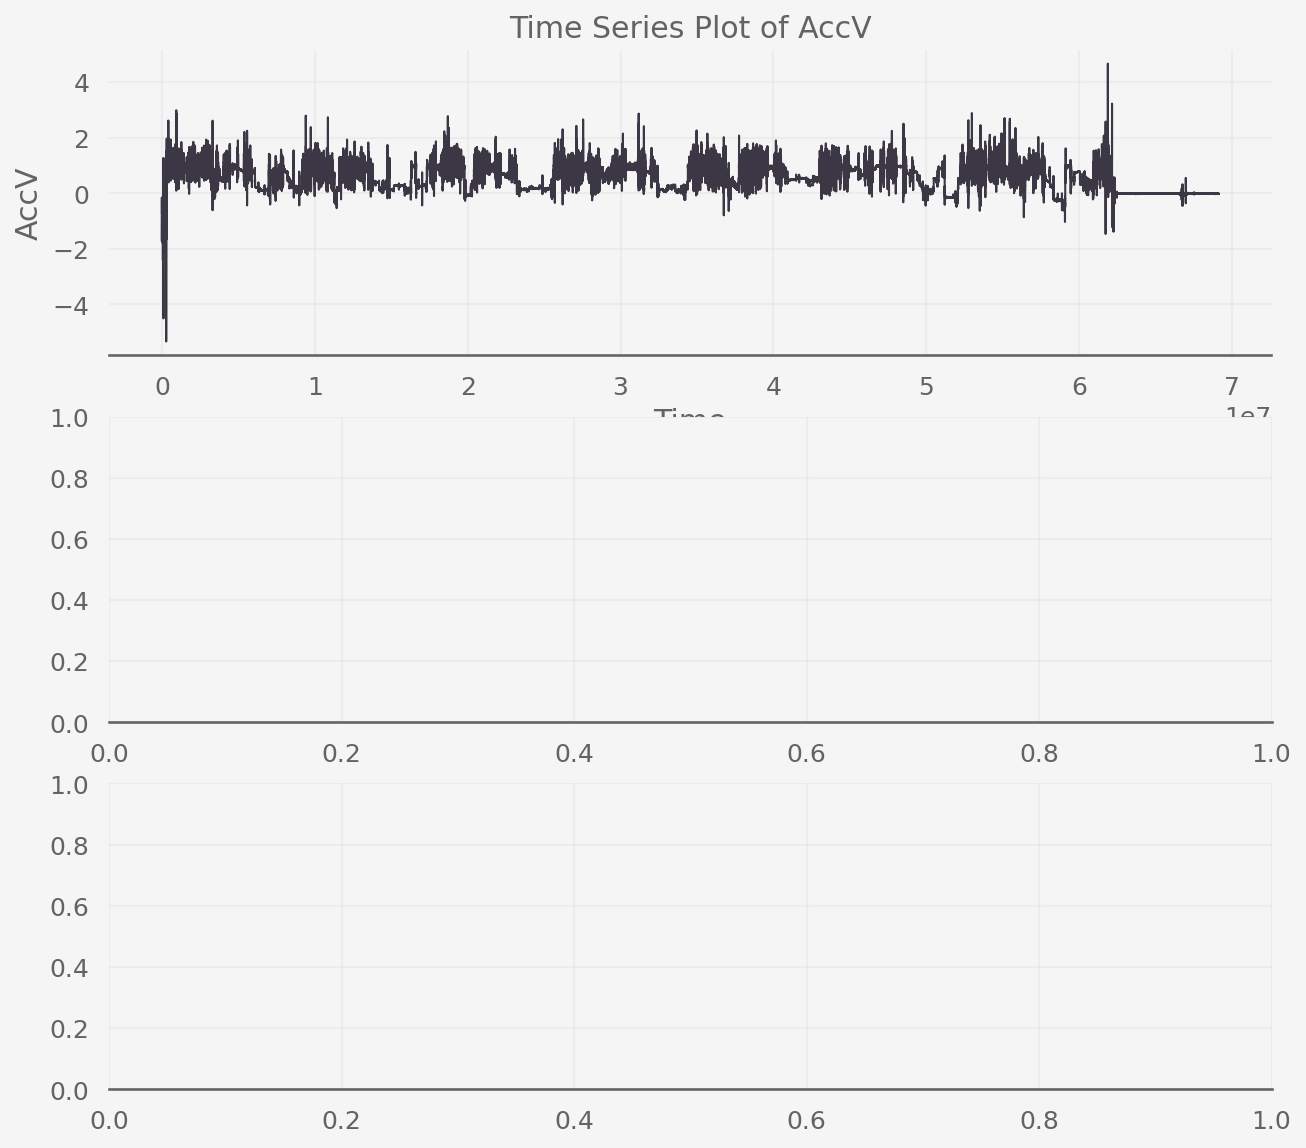

In [106]:
features = ['AccV','AccML','AccAP']

fig, axes = plt.subplots(3, 1, figsize=(10, 9))

for ax, col in zip(axes.ravel(), features):
    sns.lineplot(unlabeled_example, x='Time', y=col, palette=grey_palette[3], ax=ax).set(title=f'Time Series Plot of {col}')
    gc.collect()

del unlabeled_example

plt.subplots_adjust(hspace=0.45)
plt.suptitle(f"Time Series Plots of Unlabeled Example Accelerometer Features\n\n", ha='center',  fontweight='bold', color=grey_palette[2])
plt.show()

## Metadata Files

### tdcsfog Metadata

- Identifies each series in the tdcsfog dataset by a unique Subject, Visit, Test, Medication condition.
  - Visit Lab visits consist of a baseline assessment, two post-treatment assessments for different treatment stages, and one follow-up assessment.
  - Test Which of three test types was performed, with 3 the most challenging.
  - Medication Subjects may have been either off or on anti-parkinsonian medication during the recording.

In [109]:
gc.collect()

34079